<a href="https://colab.research.google.com/github/mdonbruce/AspNetDocs/blob/master/ML_Foundations_Mini_Labs_Class_Demo_EXECUTED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Mini-Lab Series (Class Demo) — ML Foundations  
**Google Colab / Jupyter Notebook Ready**

## What you will practice
1. **Mini-Lab 1:** Identify **classification vs regression vs clustering** from dataset characteristics  
2. **Mini-Lab 2:** Implement **vector + matrix operations** from scratch and compare with **NumPy**  
3. **Mini-Lab 3:** Use **eigendecomposition** to perform **PCA** and visualize variance & projections  
4. **Mini-Lab 4:** Apply **SVD** to **compress an image** and observe quality vs compression tradeoffs

> Tip (Colab): Upload the provided `.csv` files via the left sidebar **Files → Upload** (or mount Drive).



## Setup (Run first)

This cell:
- Imports libraries  
- Defines a small helper function for clean printing  
- Sets a random seed for reproducibility


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

def show(df, n=5):
    display(df.head(n))



# Mini-Lab 1 — Understanding ML Task Types

### Goal  
Train your eye (and your code) to correctly label a task as:
- **Classification** (predict categories)
- **Regression** (predict numeric values)
- **Clustering / Unsupervised** (no target label; group patterns)

### Dataset
`mini_lab1_task_types_dataset.csv`

Columns:
- `feat_1` … `feat_8` (features)
- `target_class` (categorical label → classification)
- `target_reg` (continuous value → regression)

### Step-by-step
1. Load the dataset  
2. Inspect data types & unique values  
3. Write an `infer_task_type()` function  
4. Test it on both targets  
5. *(Stretch)* Detect unsupervised datasets (no target column)


In [ ]:
df = pd.read_csv("mini_lab1_task_types_dataset.csv")
print("Shape:", df.shape)
show(df, 5)
print("\nDtypes:\n", df.dtypes)

Shape: (10000, 11)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,target_class,target_reg,cluster_hint
0,-0.709296,-0.196154,0.750451,0.940565,-1.951035,-1.302180,0.127840,-0.316243,MediumRisk,-1.130680,1
1,-2.174481,0.126377,0.879398,0.777792,0.066031,1.127241,0.467509,-0.859292,LowRisk,-5.065774,1
2,2.398904,0.670510,0.878450,-0.049926,-0.184862,-0.680930,1.222541,-0.154529,HighRisk,6.903610,0
3,2.370025,1.465112,0.532309,0.365444,0.412733,0.430821,2.141648,-0.406415,HighRisk,6.600544,0
4,1.739296,2.009058,0.615979,1.128972,-0.113947,-0.840156,-0.824481,0.650593,MediumRisk,4.769143,0



Dtypes:
 feat_1          float64
feat_2          float64
feat_3          float64
feat_4          float64
feat_5          float64
feat_6          float64
feat_7          float64
feat_8          float64
target_class     object
target_reg      float64
cluster_hint      int64
dtype: object


## Step 3 — Implement `infer_task_type()`

We use **simple heuristics**:
- If dtype is **object** or a small set of integer categories → **classification**
- If numeric with many unique values → **regression**
- If **no target provided** → treat as **clustering/unsupervised**

In [ ]:
def infer_task_type(series: pd.Series) -> str:
    """Infer ML task type from a target column.

    Returns:
        'classification' or 'regression'
    """
    # Case 1: categorical strings
    if series.dtype == "object":
        return "classification"

    # Case 2: numeric — decide by unique ratio
    unique_ratio = series.nunique() / len(series)

    # If the column only contains a few repeated numeric values,
    # it behaves like a class label (e.g., 0/1/2)
    if unique_ratio < 0.02:
        return "classification"

    return "regression"


for col in ["target_class", "target_reg"]:
    print(col, "→", infer_task_type(df[col]))

target_class → classification
target_reg → regression


## Checkpoint Questions (answer in your own words)

1. Why can an **integer** column be either classification or regression?  
2. What is a **false positive** scenario for the unique-ratio heuristic?  
3. If a dataset has **only feature columns** (no target), why is that usually **unsupervised**?



# Mini-Lab 2 — Vector and Matrix Operations

### Goal  
Build intuition for **linear algebra mechanics**:
- **Dot product** measures similarity
- **Cosine similarity** normalizes dot product by magnitudes
- **Matrix multiplication** transforms feature space
- **Vectorization** makes operations scalable

### Dataset
`mini_lab2_vectors_5000x20.csv` (5,000 vectors, 20 dims)

### Step-by-step
1. Load vectors  
2. Implement dot product *from scratch*  
3. Implement vector norm and cosine similarity  
4. Compare with NumPy  
5. Time a loop implementation vs vectorized implementation (optional)


In [ ]:
vectors = pd.read_csv("mini_lab2_vectors_5000x20.csv").to_numpy()
a = vectors[0]
b = vectors[1]
print("Vector length:", len(a))
print("First 5 values of a:", a[:5])

Vector length: 20
First 5 values of a: [-1.23881561 -0.66764049  0.81967555  0.87992361 -1.50350106]


## Step 2–4 — From scratch vs NumPy

In [ ]:
import math

def dot_product(x, y):
    total = 0.0
    for i in range(len(x)):
        total += x[i] * y[i]
    return total

def l2_norm(x):
    return math.sqrt(dot_product(x, x))

def cosine_similarity(x, y):
    return dot_product(x, y) / (l2_norm(x) * l2_norm(y))

print("Dot (scratch):", dot_product(a,b))
print("Dot (NumPy):  ", float(np.dot(a,b)))

print("Cosine (scratch):", cosine_similarity(a,b))
print("Cosine (NumPy):  ", float(np.dot(a,b) / (np.linalg.norm(a)*np.linalg.norm(b))))

Dot (scratch): -0.7804305079822651
Dot (NumPy):   -0.7804305079822642
Cosine (scratch): -0.039274951897653565
Cosine (NumPy):   -0.039274951897653516


## Visual intuition: similarity distribution

We compute cosine similarity of one vector vs a sample of others.


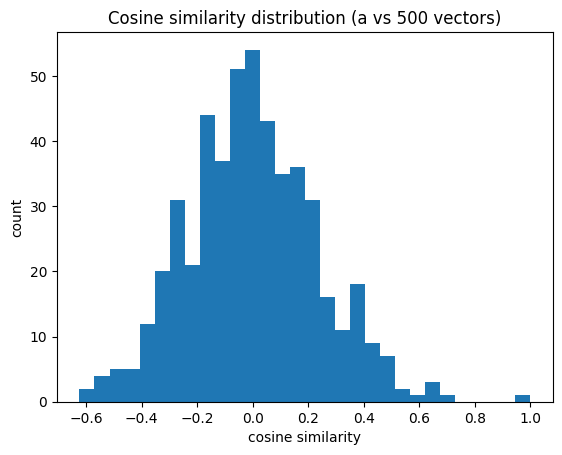

In [ ]:
sample = vectors[:500]
cos_vals = (sample @ a) / (np.linalg.norm(sample, axis=1) * np.linalg.norm(a))

plt.figure()
plt.hist(cos_vals, bins=30)
plt.title("Cosine similarity distribution (a vs 500 vectors)")
plt.xlabel("cosine similarity")
plt.ylabel("count")
plt.show()


# Mini-Lab 3 — Eigenvalues, Eigenvectors & PCA

### Goal  
Use **eigendecomposition** to:
- compute principal directions (eigenvectors)
- measure captured variance (eigenvalues)
- project high-dimensional data into 2D

### Dataset
`mini_lab3_pca_high_dim_dataset.csv`  
- 50 numeric features (`x1`…`x50`)  
- `segment` label used only for coloring points

### Step-by-step
1. Load and standardize the data  
2. Build covariance matrix  
3. Compute eigenvalues/eigenvectors  
4. Sort by variance explained  
5. Project into top-2 PCs and visualize  


In [ ]:
df = pd.read_csv("mini_lab3_pca_high_dim_dataset.csv")
X = df.drop(columns=["segment"]).to_numpy()
labels = df["segment"].to_numpy()

print("Shape:", X.shape)
print("Segments:", pd.Series(labels).value_counts().to_dict())

Shape: (12000, 50)
Segments: {'A': 6064, 'B': 5936}


## Step 1 — Standardize
PCA assumes features are on comparable scales, so we convert each feature to **z-scores**.

In [ ]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
print("Mean (first 5 features):", X_std.mean(axis=0)[:5])
print("Std  (first 5 features):", X_std.std(axis=0)[:5])

Mean (first 5 features): [ 1.62832710e-17 -3.07901852e-17  1.77635684e-17  4.73695157e-18
  2.48689958e-17]
Std  (first 5 features): [1. 1. 1. 1. 1.]


## Step 2–4 — Covariance + eigendecomposition + variance explained

Top 5 variance ratios: [0.25636151 0.21949847 0.16839772 0.15924231 0.12985306]
Cumulative variance at k=2: 0.4758599782738715


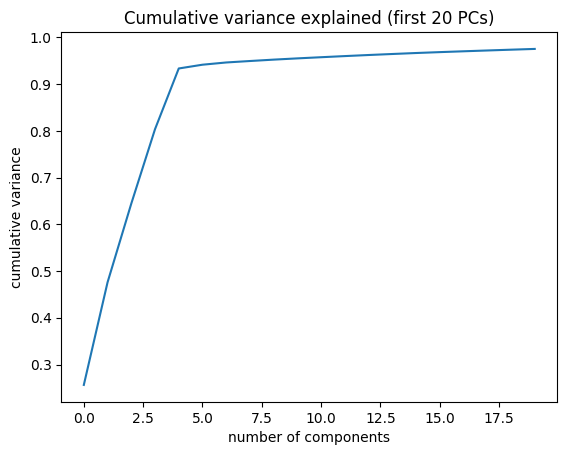

In [ ]:
C = np.cov(X_std, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(C)

# sort descending
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

var_ratio = eigvals / eigvals.sum()
cum_var = np.cumsum(var_ratio)

print("Top 5 variance ratios:", var_ratio[:5])
print("Cumulative variance at k=2:", float(cum_var[1]))

plt.figure()
plt.plot(cum_var[:20])
plt.title("Cumulative variance explained (first 20 PCs)")
plt.xlabel("number of components")
plt.ylabel("cumulative variance")
plt.show()

## Step 5 — Project into 2D and visualize

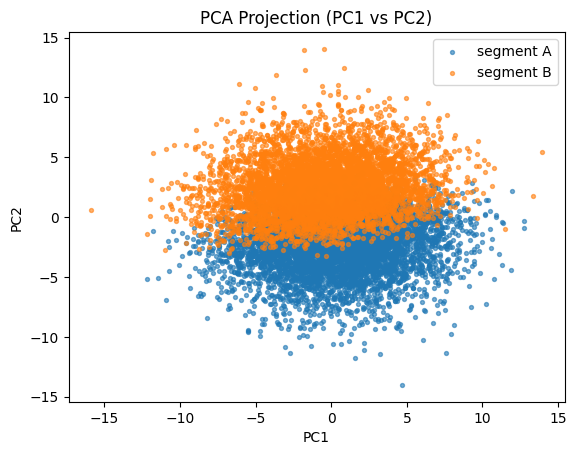

In [ ]:
Z = X_std @ eigvecs[:, :2]

plt.figure()
for seg in np.unique(labels):
    mask = labels == seg
    plt.scatter(Z[mask, 0], Z[mask, 1], s=8, alpha=0.6, label=f"segment {seg}")
plt.title("PCA Projection (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

## Checkpoint Questions
1. Why do we use `np.linalg.eigh()` instead of `np.linalg.eig()` for covariance matrices?  
2. What does it mean if **PC1 explains 70%** of the variance?  
3. How would you choose `k` components for a real ML pipeline?



# Mini-Lab 4 — Image Compression with SVD

### Goal  
Use **SVD** to compress an image:
- Keep only the top-`k` singular values/components  
- Reconstruct and compare quality  
- Observe the **tradeoff**: smaller `k` → more compression, less detail

### Dataset
`mini_lab4_image_matrix_256.csv` — a **256×256** grayscale image matrix (0–255)

### Step-by-step
1. Load image matrix  
2. Compute SVD  
3. Reconstruct using different `k` values  
4. Plot original vs reconstructions  
5. Compute compression ratio estimate


Image shape: (256, 256) dtype: int64


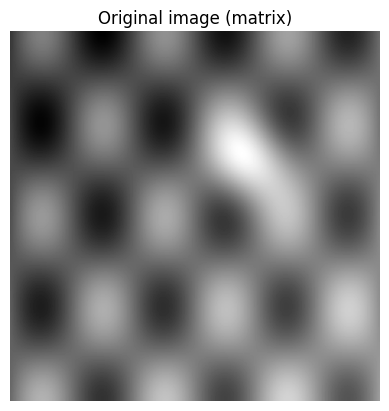

In [ ]:
img = pd.read_csv("mini_lab4_image_matrix_256.csv", header=None).to_numpy()
print("Image shape:", img.shape, "dtype:", img.dtype)

plt.figure()
plt.title("Original image (matrix)")
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

## Step 2 — SVD
We factor the image matrix **A** into **U · S · Vᵀ**.

In [ ]:
U, S, Vt = np.linalg.svd(img, full_matrices=False)
print("U:", U.shape, "S:", S.shape, "Vt:", Vt.shape)
print("Top 5 singular values:", S[:5])

U: (256, 256) S: (256,) Vt: (256, 256)
Top 5 singular values: [2.91131527e+04 8.74934442e+03 3.32380499e+03 4.39386708e+02
 1.08630279e+01]


## Step 3–4 — Reconstruct with different `k`

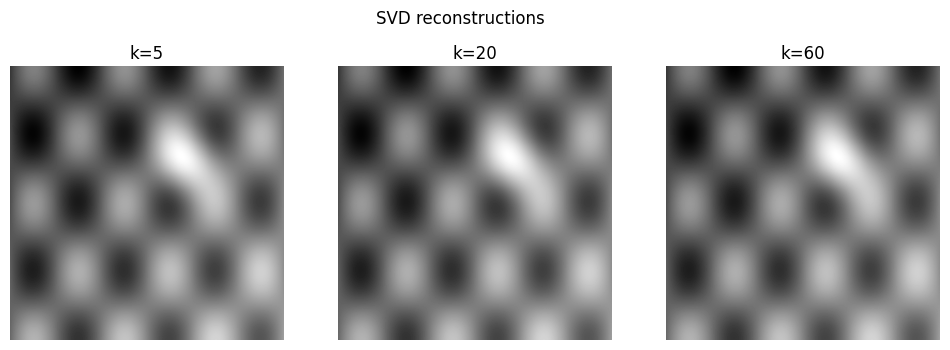

In [ ]:
def reconstruct(k):
    return (U[:, :k] * S[:k]) @ Vt[:k, :]

ks = [5, 20, 60]
plt.figure(figsize=(12,4))
for i, k in enumerate(ks, start=1):
    img_k = reconstruct(k)
    plt.subplot(1, len(ks), i)
    plt.title(f"k={k}")
    plt.imshow(img_k, cmap="gray")
    plt.axis("off")
plt.suptitle("SVD reconstructions")
plt.show()

## Step 5 — Compression ratio (rough estimate)
We compare stored numbers for the original vs the compressed representation.

In [ ]:
m, n = img.shape
orig = m*n

for k in [5, 20, 60]:
    compressed = m*k + k + k*n  # U + S + Vt
    ratio = compressed / orig
    print(f"k={k:>3}: compressed/original ≈ {ratio:.3f} (smaller is better)")

k=  5: compressed/original ≈ 0.039 (smaller is better)
k= 20: compressed/original ≈ 0.157 (smaller is better)
k= 60: compressed/original ≈ 0.470 (smaller is better)


# Wrap-Up Reflection (2–3 minutes)
- Which `k` value felt like the best tradeoff? Why?  
- How does the idea “data is structured” connect to ML model efficiency?  
- Where else in ML do we use dimensionality reduction ideas?
